In [8]:
import cv2 as cv
import pandas as pd
import numpy as np
from tensorflow.keras.layers import Dropout, Conv2D, Dense, Flatten, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow

In [9]:
train_dir=r'C:\Users\naman\Downloads\archive (1)\train'
test_dir=r'C:\Users\naman\Downloads\archive (1)\test'
train_g=ImageDataGenerator(rescale=1/255.)
test_g=ImageDataGenerator(rescale=1/255.)
train=train_g.flow_from_directory(train_dir, target_size=(48,48),batch_size=64,class_mode='categorical',color_mode='grayscale')
test=test_g.flow_from_directory(test_dir,target_size=(48,48),batch_size=64, class_mode='categorical',color_mode='grayscale')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [11]:
model=tensorflow.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu',input_shape=(48,48,1)))
model.add(Conv2D(64, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [16]:
hist=model.fit(train,epochs=60, steps_per_epoch=448, validation_data=test, validation_steps=112)

Epoch 1/60
448/448 [==============================] - 233s 518ms/step - loss: 1.7193 - accuracy: 0.3053 - val_loss: 1.4887 - val_accuracy: 0.4258
Epoch 2/60
448/448 [==============================] - 131s 292ms/step - loss: 1.4197 - accuracy: 0.4509 - val_loss: 1.2950 - val_accuracy: 0.5050
Epoch 3/60
448/448 [==============================] - 125s 280ms/step - loss: 1.2775 - accuracy: 0.5093 - val_loss: 1.2081 - val_accuracy: 0.5381
Epoch 4/60
448/448 [==============================] - 127s 283ms/step - loss: 1.1994 - accuracy: 0.5425 - val_loss: 1.1542 - val_accuracy: 0.5582
Epoch 5/60
448/448 [==============================] - 132s 296ms/step - loss: 1.1462 - accuracy: 0.5656 - val_loss: 1.1268 - val_accuracy: 0.5688
Epoch 6/60
448/448 [==============================] - 132s 295ms/step - loss: 1.0951 - accuracy: 0.5819 - val_loss: 1.0944 - val_accuracy: 0.5820
Epoch 7/60
448/448 [==============================] - 147s 329ms/step - loss: 1.0482 - accuracy: 0.6059 - val_loss: 1.1055 -

Epoch 57/60
448/448 [==============================] - 150s 336ms/step - loss: 0.3078 - accuracy: 0.8928 - val_loss: 1.3401 - val_accuracy: 0.6268
Epoch 58/60
448/448 [==============================] - 151s 337ms/step - loss: 0.3036 - accuracy: 0.8936 - val_loss: 1.3439 - val_accuracy: 0.6307
Epoch 59/60
448/448 [==============================] - 151s 337ms/step - loss: 0.2910 - accuracy: 0.8982 - val_loss: 1.4400 - val_accuracy: 0.6197
Epoch 60/60
448/448 [==============================] - 153s 341ms/step - loss: 0.3026 - accuracy: 0.8940 - val_loss: 1.4048 - val_accuracy: 0.6303


(0.0, 2.0)

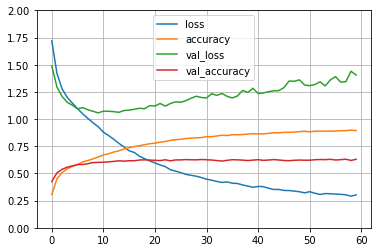

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
pd.DataFrame(hist.history).plot()
plt.grid(True)
plt.gca().set_ylim(0,2)

In [18]:
model.save('facial.h5')
model.save_weights('facial_weights.h5')

In [21]:
model.load_weights('facial_weights.h5')

In [23]:
model.get_weights()

[array([[[[ 2.22825795e-01, -1.30669370e-01, -4.39489633e-02,
            4.24721688e-02, -4.35803682e-01, -1.28791392e-01,
            1.10027067e-01, -1.64147332e-01, -1.17988296e-01,
            1.01793848e-01,  1.52354300e-01, -1.74711466e-01,
           -1.12397537e-01, -5.81970811e-02, -1.95558257e-02,
            3.71504068e-01,  3.22955638e-01,  2.80536801e-01,
            2.05718707e-02,  1.74543243e-02,  1.21191330e-01,
           -4.02841754e-02, -2.12874711e-02, -2.57603288e-01,
           -2.48986423e-01,  2.14900032e-01, -1.53886408e-01,
            1.05203219e-01, -1.21705711e-01,  6.64922893e-02,
           -2.75764644e-01, -1.22155465e-01]],
 
         [[ 5.85162006e-02,  2.78566498e-02, -9.86878648e-02,
           -9.76836383e-02, -7.45706856e-02, -4.73450273e-02,
           -9.73957554e-02,  4.95427996e-02, -2.50358015e-01,
            1.40801929e-02,  1.18641809e-01, -1.86995998e-01,
           -1.86660871e-01, -1.61440372e-01, -1.39199004e-01,
            5.3829137